# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

---
## Desarrollo del modelo de K-Nearest Neighbors (KNN)
---

#### Carga de datos

In [1]:
import pandas as pd

In [2]:
# Cargar datasets
X_train = pd.read_csv("output/burnout_X_train.csv")
y_train = pd.read_csv("output/burnout_y_train.csv")
X_test = pd.read_csv("output/burnout_X_test.csv")
y_test = pd.read_csv("output/burnout_y_test.csv")

X_train_pca = pd.read_csv("output/burnout_X_train_PCA.csv")
X_test_pca = pd.read_csv("output/burnout_X_test_PCA.csv")

**Importancia de la estandarización en KNN y su relación con PCA**

El modelo K-Nearest Neighbors (KNN) es muy sensible a las escalas de las variables, ya que se basa en medidas de distancia (como la euclídea). Por eso, es fundamental estandarizar las variables antes de aplicar este modelo. En este caso, **los datos originales (`burnout_X_train.csv` y `burnout_X_test.csv`) ya fueron estandarizados previamente utilizando `StandardScaler`** antes de realizar cualquier modelado o reducción de dimensionalidad.

Al aplicar PCA, es buena práctica hacerlo también sobre un dataset previamente estandarizado, dado que PCA también es sensible a la escala de las variables. Por lo tanto, **los datasets `X_train_PCA` y `X_test_PCA` ya son el resultado de aplicar PCA sobre datos previamente estandarizados**.

Por esta razón, **no es necesario volver a aplicar `StandardScaler` sobre los datasets PCA**, ya que eso implicaría reescalar componentes que ya fueron generados a partir de un espacio ortogonal y escalado. Hacerlo podría distorsionar la proporción de varianzas explicadas y afectar negativamente el rendimiento del modelo.

### KNN sin y con PCA

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# KNN con datos originales
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train.values.ravel())
y_pred_original = knn_original.predict(X_test)

# KNN con datos PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train.values.ravel())
y_pred_pca = knn_pca.predict(X_test_pca)

# Reportes
report_original = classification_report(y_test, y_pred_original)
report_pca = classification_report(y_test, y_pred_pca)

print("Reporte con datos originales:\n", report_original)
print("\nReporte con datos PCA:\n", report_pca)

Reporte con datos originales:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1136
         1.0       0.84      0.89      0.86      2514
         2.0       0.79      0.63      0.70       637

    accuracy                           0.84      4287
   macro avg       0.82      0.78      0.80      4287
weighted avg       0.83      0.84      0.83      4287


Reporte con datos PCA:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1136
         1.0       0.84      0.88      0.86      2514
         2.0       0.75      0.62      0.68       637

    accuracy                           0.83      4287
   macro avg       0.81      0.78      0.79      4287
weighted avg       0.83      0.83      0.83      4287



In [4]:
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [5]:
from sklearn.metrics import f1_score

f1_original = f1_score(y_test, y_pred_original, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

In [6]:
from IPython.display import display, Markdown

# Mostrar encabezado con texto enriquecido
display(Markdown("Resultados del modelo **KNN** ( `k=5` ) en ambos escenarios:"))

# Crear tabla de comparación
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-score"],
    "Datos Originales": [f"{accuracy_original:.4f}", f"{f1_original:.4f}"],
    "Datos con PCA": [f"{accuracy_pca:.4f}", f"{f1_pca:.4f}"]
})

# Mostrar tabla
display(resultados)

Resultados del modelo **KNN** ( `k=5` ) en ambos escenarios:

,Métrica,Datos Originales,Datos con PCA
0,Accuracy,0.8353,0.8286
1,F1-score,0.8328,0.8264


#### Conclusión

El modelo KNN muestra un desempeño ligeramente superior cuando se entrena con los datos originales en comparación con los datos transformados por PCA. Aun así, PCA puede ser útil para reducir la dimensionalidad y el costo computacional en modelos más complejos.

### Accuracy del Modelo KNN según K

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

k_values = list(range(1, 21))
accuracies_original = []
f1_scores_original = []
accuracies_pca_corrected = []
f1_scores_pca_corrected = []

for k in k_values:
    # Datos originales
    knn_orig = KNeighborsClassifier(n_neighbors=k)
    knn_orig.fit(X_train, y_train.values.ravel())
    y_pred_orig = knn_orig.predict(X_test)
    accuracies_original.append(accuracy_score(y_test, y_pred_orig))
    f1_scores_original.append(f1_score(y_test, y_pred_orig, average="weighted"))

    # Datos PCA sin reescalar
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_train_pca, y_train.values.ravel())
    y_pred_pca = knn_pca.predict(X_test_pca)
    accuracies_pca_corrected.append(accuracy_score(y_test, y_pred_pca))
    f1_scores_pca_corrected.append(f1_score(y_test, y_pred_pca, average="weighted"))


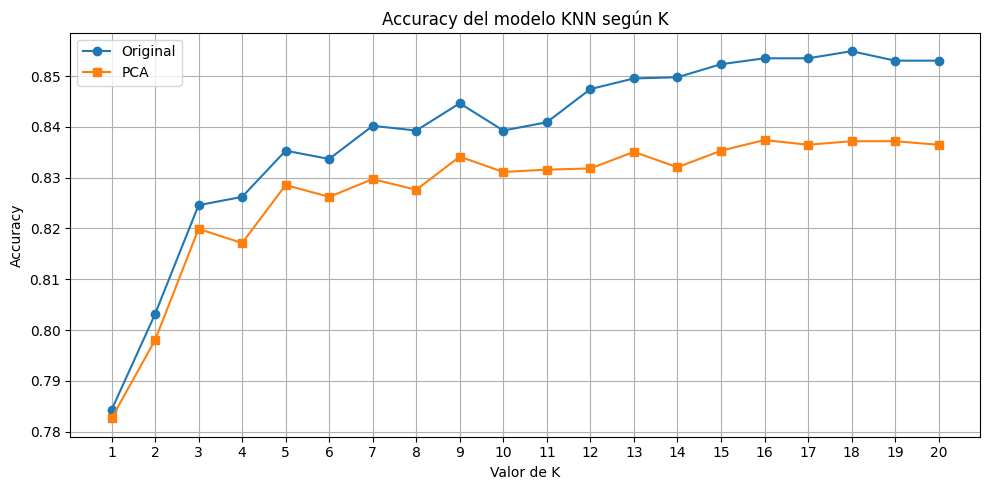

In [8]:
# Accuracy vs K
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies_original, marker='o', label="Original")
plt.plot(k_values, accuracies_pca_corrected, marker='s', label="PCA")
plt.xticks(k_values)
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")
plt.title("Accuracy del modelo KNN según K")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La precisión del modelo varía con el valor de \( k \). El rendimiento tiende a estabilizarse a partir de valores moderados de \( k \) y el modelo con datos originales presenta una leve ventaja sobre los datos transformados con PCA.

### F1-score del Modelo KNN según K

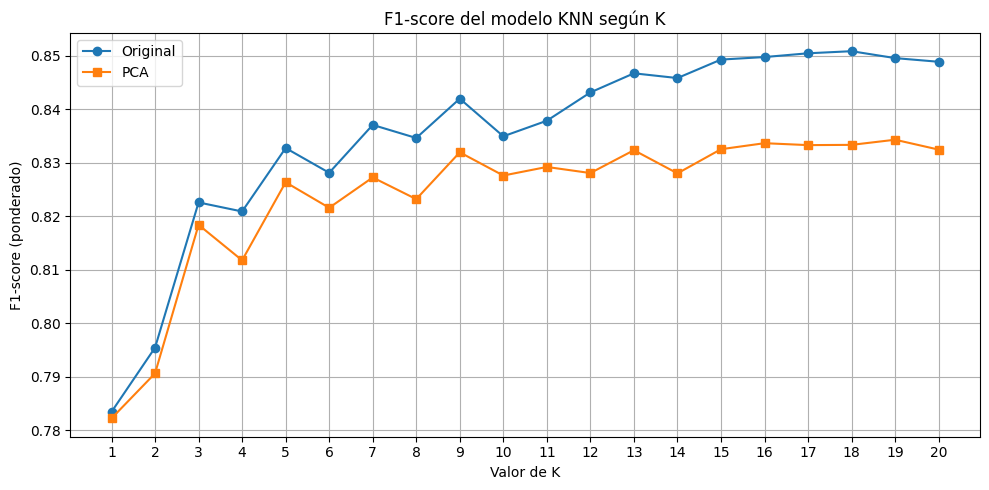

In [9]:
# F1-score vs K
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), f1_scores_original, marker='o', label="Original")
plt.plot(range(1, 21), f1_scores_pca_corrected, marker='s', label="PCA")
plt.xticks(k_values)
plt.xlabel("Valor de K")
plt.ylabel("F1-score (ponderado)")
plt.title("F1-score del modelo KNN según K")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El F1-score ponderado muestra un patrón similar al de la accuracy. La versión con datos originales tiene una ligera superioridad, especialmente en los valores bajos de \( k \).

#### Conclusión

- El modelo KNN mostró **mejor desempeño en accuracy y F1-score con los datos originales** que con los datos reducidos por PCA.
- La aplicación de PCA simplificó el espacio de características, pero a costa de una leve pérdida de precisión.
- **No es necesario estandarizar nuevamente los datos resultantes del PCA**, ya que estos componentes ya derivan de variables previamente escaladas.

Usar PCA puede ser útil cuando se busca reducir dimensionalidad para modelos más complejos o cuando se enfrenta alta multicolinealidad, pero en KNN, si el tiempo de cómputo no es un problema, conviene mantener las variables originales estandarizadas.

### Curvas ROC - Comparación multiclase (One-vs-Rest)

Se evaluó la performance del modelo KNN (`k=5`) para cada clase mediante curvas ROC con un enfoque *one-vs-rest* (OvR). 
A continuación, se presentan los gráficos por separado para los modelos entrenados con datos originales y con datos reducidos por PCA.

In [10]:
import numpy as np
from sklearn.preprocessing import label_binarize

# Definir clases y binarizar etiquetas
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

In [11]:
from sklearn.metrics import roc_curve, auc

# Obtener predicciones probabilísticas
y_score_original = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train.values.ravel()).predict_proba(X_test)
y_score_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train.values.ravel()).predict_proba(X_test_pca)

# Inicializar estructuras
fpr_original, tpr_original, roc_auc_original = dict(), dict(), dict()
fpr_pca, tpr_pca, roc_auc_pca = dict(), dict(), dict()

# Calcular curvas y AUC para cada clase
for i, label in enumerate(classes):
    fpr_original[i], tpr_original[i], _ = roc_curve(y_test_bin[:, i], y_score_original[:, i])
    roc_auc_original[i] = auc(fpr_original[i], tpr_original[i])

    fpr_pca[i], tpr_pca[i], _ = roc_curve(y_test_bin[:, i], y_score_pca[:, i])
    roc_auc_pca[i] = auc(fpr_pca[i], tpr_pca[i])

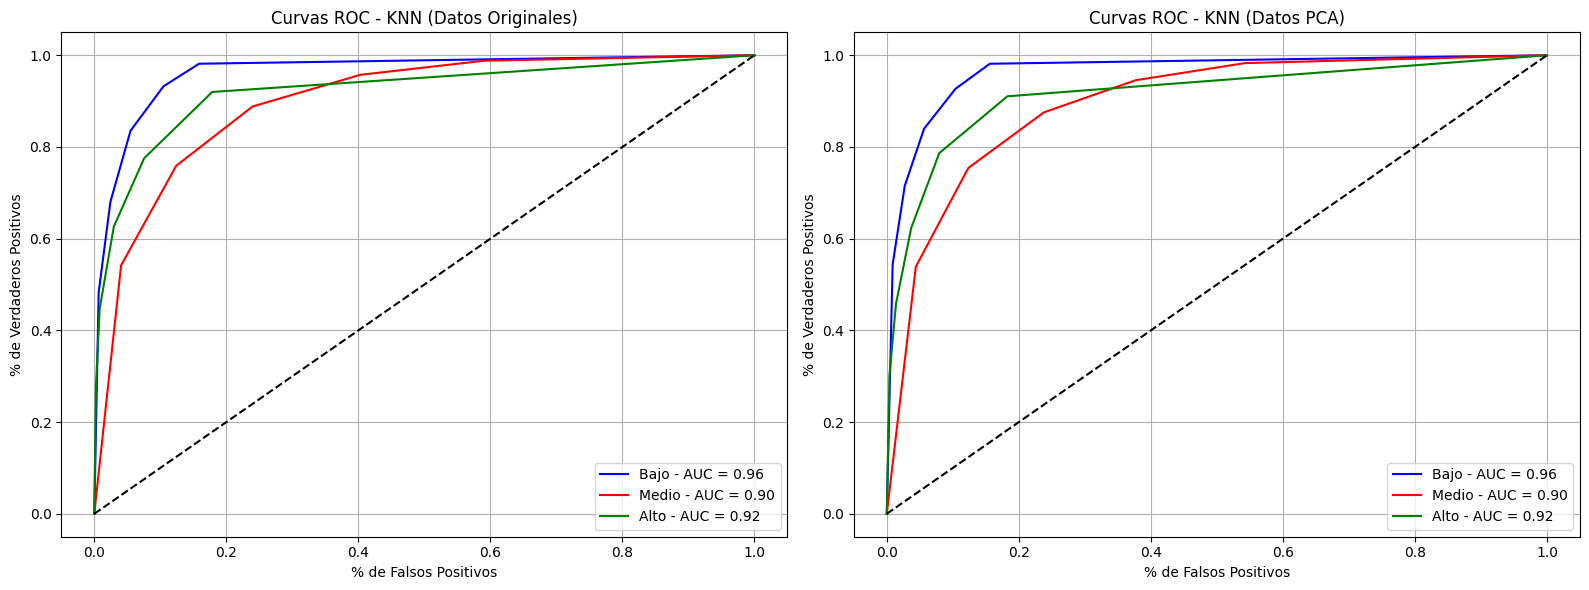

In [14]:
# Curvas ROC por clase - Datos Originales
import matplotlib.pyplot as plt

colors = {0.0: 'blue', 1.0: 'red', 2.0: 'green'}
label_names = {0.0: 'Bajo', 1.0: 'Medio', 2.0: 'Alto'}

# Unificar ambos gráficos en un solo bloque con subplots lado a lado

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Curvas ROC - Datos Originales
for i, label in enumerate(classes):
    axes[0].plot(fpr_original[i], tpr_original[i],
                 label=f'{label_names[label]} - AUC = {roc_auc_original[i]:.2f}',
                 color=colors[label])
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title("Curvas ROC - KNN (Datos Originales)")
axes[0].set_xlabel("% de Falsos Positivos")
axes[0].set_ylabel("% de Verdaderos Positivos")
axes[0].legend(loc="lower right")
axes[0].grid(True)

# Curvas ROC - Datos PCA
for i, label in enumerate(classes):
    axes[1].plot(fpr_pca[i], tpr_pca[i],
                 label=f'{label_names[label]} - AUC = {roc_auc_pca[i]:.2f}',
                 color=colors[label])
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title("Curvas ROC - KNN (Datos PCA)")
axes[1].set_xlabel("% de Falsos Positivos")
axes[1].set_ylabel("% de Verdaderos Positivos")
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Conclusión Final - Curvas ROC

Los gráficos comparativos muestran las curvas ROC para cada clase del modelo KNN entrenado con:

- **Datos originales estandarizados** (izquierda)
- **Datos transformados por PCA** (derecha)

**Principales observaciones:**
- El área bajo la curva (**AUC**) es alta en ambos casos para las tres clases (**Bajo, Medio y Alto**), lo que indica una buena capacidad del modelo para distinguir entre categorías.
- Las curvas son muy similares entre ambos enfoques, lo que sugiere que **la reducción de dimensionalidad mediante PCA no afecta significativamente la capacidad del modelo para discriminar probabilísticamente entre clases.**
- Sin embargo, como vimos anteriormente, **el modelo con datos originales logra una mayor precisión y F1-score** en la clasificación exacta, lo que lo convierte en la mejor opción cuando el objetivo es acertar la clase específica.

**Conclusión**: 

Aunque PCA mantiene una buena separación entre clases desde el punto de vista probabilístico (AUC), la pérdida de precisión en la predicción exacta sugiere que **mantener los datos originales estandarizados es más conveniente para el modelo KNN en este caso**.
